In [1]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Mounted at /gdrive


In [2]:
import os
os.getcwd()

'/content'

In [6]:
# /gdrive/My Drive/

import pandas as pd

df1 = pd.read_csv('/gdrive/My Drive/고려대 통계학과 2021~/2021년 2학기/통계적 머신러닝_박유성 교수님/jupyter/data/rossmann-store-sales/train.csv', engine='python')
df1.shape

(1017209, 9)

In [7]:
# 특성변수명과 형태를 보기 위해 df1.head()를 실행
# 맨 위 5개를 뽑아냄

df1.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [8]:
df2 = pd.read_csv('/gdrive/My Drive/고려대 통계학과 2021~/2021년 2학기/통계적 머신러닝_박유성 교수님/jupyter/data/rossmann-store-sales/store.csv', engine='python')
df2.shape

(1115, 10)

In [9]:
df2.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [10]:
# df1과 df2를 Store 변수로 하나의 데이터셋으로 만든다

df = pd.merge(df1, df2, on='Store')
df.shape

(1017209, 18)

In [12]:
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN


In [24]:
df.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Month,Quarter,Year,Day,Week,Season
1017204,1115,6,2013-01-05,4771,339,1,0,0,1,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec",1,1,2013,5,1,Winter
1017205,1115,5,2013-01-04,4540,326,1,0,0,1,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec",1,1,2013,4,1,Winter
1017206,1115,4,2013-01-03,4297,300,1,0,0,1,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec",1,1,2013,3,1,Winter
1017207,1115,3,2013-01-02,3697,305,1,0,0,1,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec",1,1,2013,2,1,Winter
1017208,1115,2,2013-01-01,0,0,0,0,a,1,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec",1,1,2013,1,1,Winter


In [13]:
df.dtypes

Store                          int64
DayOfWeek                      int64
Date                          object
Sales                          int64
Customers                      int64
Open                           int64
Promo                          int64
StateHoliday                  object
SchoolHoliday                  int64
StoreType                     object
Assortment                    object
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                 object
dtype: object

In [14]:
print(len(df['Store'].unique()))
print(len(df['Date'].unique()))
print(df['DayOfWeek'].value_counts())

1115
942
5    145845
4    145845
3    145665
2    145664
7    144730
6    144730
1    144730
Name: DayOfWeek, dtype: int64


In [23]:
import numpy as np

# pd.to_datetime : Date 변수를 년도, 월, 계절 등으로 분류할 때 쓰는 함수
# infer_datetime_format=True : 날짜변수 분류작업 속도를 높이기 위해 사용
df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True)
df['Month'] = df['Date'].dt.month
df['Quarter'] = df['Date'].dt.quarter
df['Year'] = df['Date'].dt.year
df['Day'] = df['Date'].dt.day
df['Week'] = df['Date'].dt.week
df['Season'] = np.where(df['Month'].isin([3, 4, 5]), 'Spring',
                        np.where(df['Month'].isin([6, 7, 8]), 'Summer',
                        np.where(df['Month'].isin([9, 10, 11]), 'Fall',
                        np.where(df['Month'].isin([12, 1, 2]), 'Winter', 'None'))))

print(df[['Date', 'Year', 'Month', 'Day', 'Week', 'Quarter', 'Season']].head())
print('-' * 70)
print(df[['Date', 'Year', 'Month', 'Day', 'Week', 'Quarter', 'Season']].tail())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  


        Date  Year  Month  Day  Week  Quarter  Season
0 2015-07-31  2015      7   31    31        3  Summer
1 2015-07-30  2015      7   30    31        3  Summer
2 2015-07-29  2015      7   29    31        3  Summer
3 2015-07-28  2015      7   28    31        3  Summer
4 2015-07-27  2015      7   27    31        3  Summer
----------------------------------------------------------------------
              Date  Year  Month  Day  Week  Quarter  Season
1017204 2013-01-05  2013      1    5     1        1  Winter
1017205 2013-01-04  2013      1    4     1        1  Winter
1017206 2013-01-03  2013      1    3     1        1  Winter
1017207 2013-01-02  2013      1    2     1        1  Winter
1017208 2013-01-01  2013      1    1     1        1  Winter


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f47285c1110>,
      dtype=object)

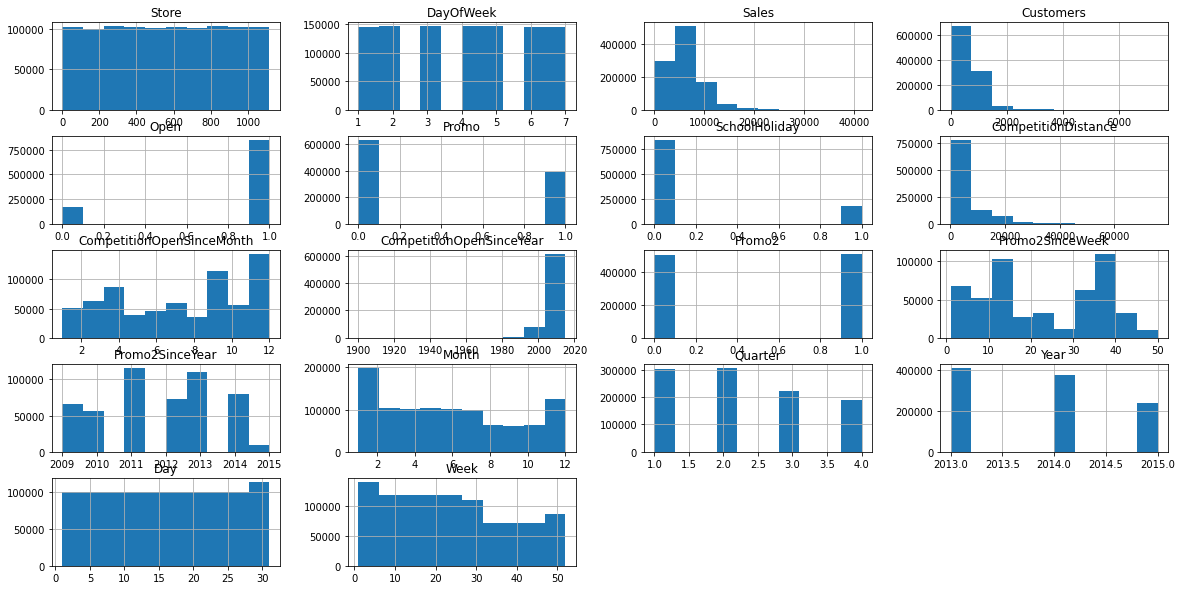

In [28]:
# 자료의 결측 정도를 보기 위한 프로그램과 출력결과

df.hist(figsize=(20, 10))

In [29]:
# 자료의 결측치가 10% 이하이면 결측치를 대체하기 위한 노력을 할 필요가 있지만,
# 30% 이상이면 해당 변수를 제거하는 것이 모형의 임의성을 피할 수 있는 거의 유일한 방법이라고 할 수 있음.

df.isnull().sum() / df.shape[0] * 100

Store                         0.000000
DayOfWeek                     0.000000
Date                          0.000000
Sales                         0.000000
Customers                     0.000000
Open                          0.000000
Promo                         0.000000
StateHoliday                  0.000000
SchoolHoliday                 0.000000
StoreType                     0.000000
Assortment                    0.000000
CompetitionDistance           0.259730
CompetitionOpenSinceMonth    31.787764
CompetitionOpenSinceYear     31.787764
Promo2                        0.000000
Promo2SinceWeek              49.943620
Promo2SinceYear              49.943620
PromoInterval                49.943620
Month                         0.000000
Quarter                       0.000000
Year                          0.000000
Day                           0.000000
Week                          0.000000
Season                        0.000000
dtype: float64

In [49]:
# 책은 0이라고 하던데?

df['CompetitionDistance'] = df['CompetitionDistance'].fillna(df['CompetitionDistance'].mode())
df['CompetitionDistance'].isnull()

0          False
1          False
2          False
3          False
4          False
           ...  
1017204    False
1017205    False
1017206    False
1017207    False
1017208    False
Name: CompetitionDistance, Length: 1017209, dtype: bool

In [50]:
df['CompetitionDistance'].isnull().sum()

0

In [51]:
df['CompetitionDistance']

0          1270
1          1270
2          1270
3          1270
4          1270
           ... 
1017204    5350
1017205    5350
1017206    5350
1017207    5350
1017208    5350
Name: CompetitionDistance, Length: 1017209, dtype: object

In [52]:
df['CompetitionDistance'].notnull()

0          True
1          True
2          True
3          True
4          True
           ... 
1017204    True
1017205    True
1017206    True
1017207    True
1017208    True
Name: CompetitionDistance, Length: 1017209, dtype: bool

In [53]:
df['CompetitionDistance'].notnull().sum()

1017209

In [54]:
print(1014567 + 2642)

1017209


In [55]:
df['CompetitionDistance'].mode()

0    250
dtype: object

In [56]:
df['CompetitionDistance'] = df['CompetitionDistance'].fillna(250)
df['CompetitionDistance'].isnull().sum()

0

In [57]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
n_columns = ['Customers', 'Open', 'Promo', 'Promo2', 'StateHoliday', 'SchoolHoliday', 'CompetitionDistance']
categ_columns = ['DayOfWeek', 'Quarter', 'Month', 'Year', 'StoreType', 'Assortment', 'Season']

In [58]:
# Label Encoding과 One-Hot 코딩을 처리하기 위해 Dummy라는 함수를 만듦

def dummy(data, col):
  # 0 ~ c-1로 클래스 부여
  lab = LabelEncoder()
  aa = lab.fit_transform(data[col]).reshape(-1, 1)
  ohe = OneHotEncoder(sparse=False)
  column_names = [col + '_' + str(i) for i in lab.classes_]
  return(pd.DataFrame(ohe.fit_transform(aa), columns=column_names))

In [60]:
fdata = df[n_columns]

for column in categ_columns:
  temp_df = dummy(df, column)
  fdata = pd.concat([fdata, temp_df], axis=1)
fdata.head()

,Customers,Open,Promo,Promo2,StateHoliday,SchoolHoliday,CompetitionDistance,DayOfWeek_1,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7,Quarter_1,Quarter_2,Quarter_3,Quarter_4,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,Year_2013,Year_2014,Year_2015,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c,Season_Fall,Season_Spring,Season_Summer,Season_Winter
0,555,1,1,0,0,1,1270,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,546,1,1,0,0,1,1270,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,523,1,1,0,0,1,1270,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,560,1,1,0,0,1,1270,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,612,1,1,0,0,1,1270,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [62]:
# one-hot encoding을 실시한 후 변수가 44개 증가한 것을 확인할 수 있음.

fdata.shape

(1017209, 44)

In [63]:
# 문자형 변수가 아직 존재함

fdata.dtypes.unique()

array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

In [65]:
# 변수 타입이 Object인 변수는 StateHoliday임을 알 수 있음.
# 0 : 휴일이 아닌 날, a : 공휴일, b : 부활절, c : 크리스마스

fdata['StateHoliday'].unique()

array(['0', 'a', 'b', 'c'], dtype=object)

In [68]:
# 휴일과 휴일이 아닌 이항변수로 분류하더라도 분석에 큰 영향이 없을 것으로 판단되어
# 휴일이 아니면 0, 휴일이면 1 값을 부여하여 이항변수로 전환

fdata['StateHoliday'] = np.where(fdata['StateHoliday']=='o', 0, 1)